# Building a wordcloud based on one year of bulletins

## Créer un fichier contenant les bulletins d'une année donnée

In [24]:
# Choisir une année

YEAR = 1847

In [25]:
# Lister les fichiers de cette année

from os import listdir
from os.path import isfile, join

data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in listdir(txt_path) if isfile(join(txt_path, f)) and str(YEAR) in f]
txts

['Bxl_1847_Tome_I1_Part_1.txt',
 'Bxl_1847_Tome_I1_Part_2.txt',
 'Bxl_1847_Tome_I1_Part_3.txt',
 'Bxl_1847_Tome_I1_Part_4.txt',
 'Bxl_1847_Tome_I1_Part_5.txt']

In [26]:
# Stocker le contenu de ces fichiers dans une liste

content_list = []
for txt in txts:
    with open(f'{txt_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

In [27]:
# Vérifier le nombre de contenus collectés

len(content_list)

5

In [28]:
# Imprimer les 200 premiers caractères du contenu du premier fichier

content_list[0][:200]

'V I L L E DE\n\nBRUXELLES\n\nbulletin ires 8éanas\nDl!\n\nCONSEIL\n\nCOMMUNAL\n\nANNÉE\n\n1847.\n\n\x0cAU\n\n\x0cVILLE DE B R U X E L L E S .\n\nbulletin\n\nCONSEIL\n\nàes\n\nSéances\n\nCOMMUNAL.\n\nANNÉE\n\n1847.\n\nBRUXELLES,\nIMPRIMERIE\n'

In [29]:
# Ecrire tout le contenu dans un fichier

with open(f'{YEAR}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

## Enlever les stopwords, les mots courts et non alphabétiques et stocker le résultat dans un nouveau fichier

In [30]:
# Imprimer le contenu du fichier et constater les "déchets"

with open(f'{YEAR}.txt', 'r', encoding='utf-8' ) as f:
    before = f.read()

before[:500]

"V I L L E DE\n\nBRUXELLES\n\nbulletin ires 8éanas\nDl!\n\nCONSEIL\n\nCOMMUNAL\n\nANNÉE\n\n1847.\n\n\x0cAU\n\n\x0cVILLE DE B R U X E L L E S .\n\nbulletin\n\nCONSEIL\n\nàes\n\nSéances\n\nCOMMUNAL.\n\nANNÉE\n\n1847.\n\nBRUXELLES,\nIMPRIMERIE\n\nD E J . H. B R I A R D ,\n\nRITE N E U V E , 3 1 , FAUBOURG DE N A M U R ,\n\n1 84 8\n\n\x0cDE!\n\nDU CONSEI\nDîBÏ\n\nE. - Communication\nconclusions de la section des\ndu nouvel hospice pour les av\n\nEnraisonde l'absence &\nmaladie.le Conseil ajourne\nleurs de pierre el marchai\ncles des taxes communale'\nbieniàance e"

In [31]:
# Appliquer la fonction filtering (que vous pouvez customiser)

from filtering import filtering

filtering(YEAR)

'Output has been written in 1847_keywords.txt!'

In [32]:
# Vérifier le résultat

with open(f'{YEAR}_keywords.txt', 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'bruxelles bulletin ires conseil communal année bulletin conseil àes séances communal année bruxelles imprimerie rite faubourg consei dîbï communication conclusions section nouvel hospice enraisonde absence maladie conseil ajourne pierre marchai cles taxes communale bieniàance eldeseiànv communie mandant gnant envoi etat obligatoire secrétariat dtput proposition dan donné lecture glissement marc royales fai phonnenr terrains rèumsderb combinaison devoir dow marcs iraocs mètres espourvica lém comp'

## Créer le word cloud

In [36]:
import subprocess

command = [
    'wordcloud_cli',
    '--text', f'{YEAR}_keywords.txt',
    '--imagefile', f'{YEAR}.png',
    '--width', '2000',
    '--height', '1000',
]

subprocess.run(command, capture_output=True)

CompletedProcess(args=['wordcloud_cli', '--text', '1847_keywords.txt', '--imagefile', '1847.png', '--width', '2000', '--height', '1000'], returncode=0, stdout=b'', stderr=b'')

## Afficher le word cloud

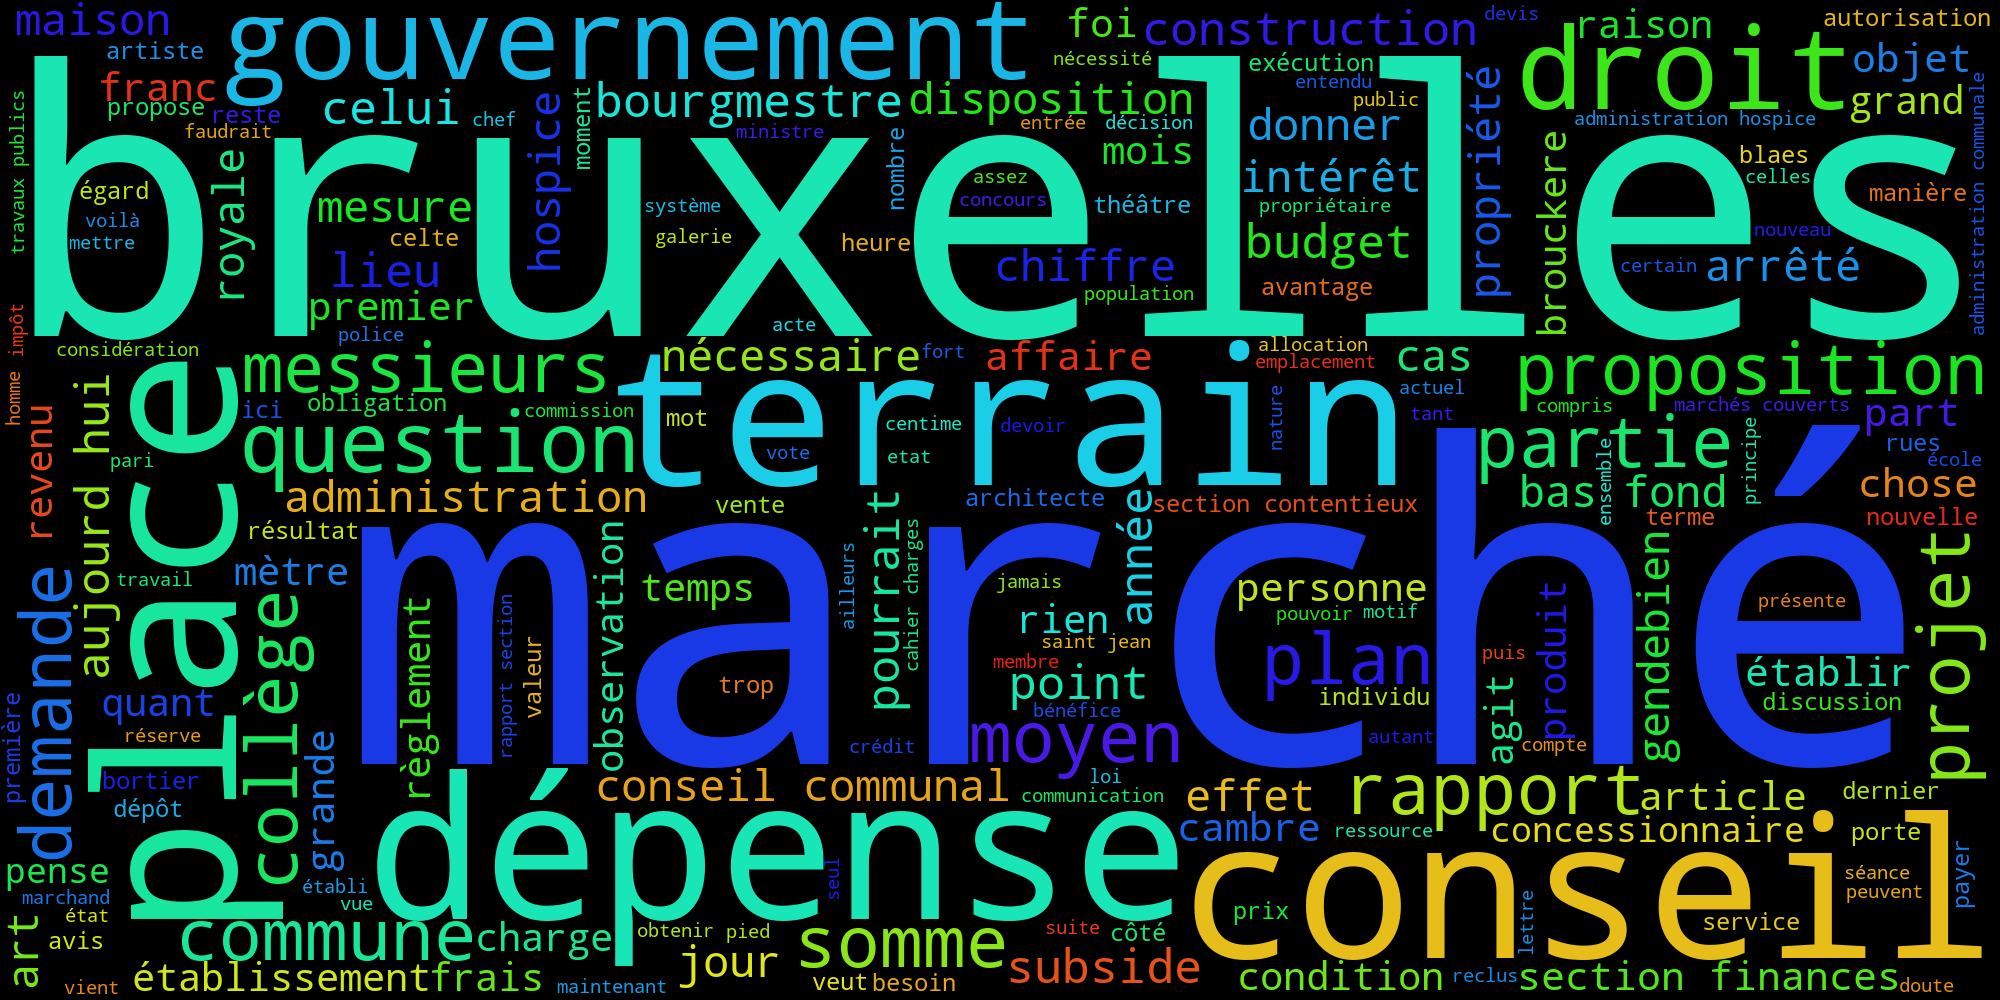

In [37]:
from IPython.display import Image

Image(filename=f'{YEAR}.png')